In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df0 = pd.read_csv('Nogales.txt', skiprows=4, sep='\s+')

In [7]:
# Dar estructura de datos (DataFrame)
df = pd.DataFrame(df0)

In [8]:
# Combinar las columnas "DD/MM/AAAA" con "HH:MM" y convertirla a variable de tiempo
# Se crea una nueva columna "Fecha" al final con formato de tiempo.
# Eliminamos las dos primeras columnas que ya no necesitaremos
df['FECHA'] = pd.to_datetime(df.apply(lambda x: x['DD/MM/AAAA'] + ' ' + x['HH:MM'], 1), dayfirst=True)
df = df.drop(['DD/MM/AAAA', 'HH:MM'], 1)

In [9]:
df.head()

,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RADSOL,FECHA
0,37.0,352.0,4.06,12.9,10.5,29.0,877.0,0.0,620.7,2019-01-24 17:00:00
1,96.0,123.0,5.48,12.5,13.1,27.0,876.7,0.0,729.2,2019-01-24 18:00:00
2,66.0,338.0,6.00,15.8,15.7,26.0,876.1,0.0,771.2,2019-01-24 19:00:00
3,24.0,58.0,8.79,23.4,17.1,24.0,875.0,0.0,737.0,2019-01-24 20:00:00
4,6.0,354.0,8.89,19.2,17.7,23.0,874.3,0.0,630.7,2019-01-24 21:00:00


In [10]:
# Análisis exploratorio de datos
df.describe()

,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RADSOL
count,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.0,139.000000
mean,220.482014,255.805755,6.019137,14.748201,12.376978,35.971223,873.312950,0.0,164.618705
std,97.760603,89.283694,4.118416,8.226701,5.505548,11.485304,1.974322,0.0,251.052767
min,5.000000,20.000000,0.260000,2.700000,2.000000,14.000000,869.900000,0.0,0.000000
25%,125.500000,224.500000,2.625000,8.000000,8.000000,27.500000,871.900000,0.0,0.000000
50%,245.000000,275.000000,5.150000,11.900000,12.400000,37.000000,873.100000,0.0,0.000000
75%,292.500000,329.000000,8.795000,21.050000,17.100000,45.000000,874.900000,0.0,280.900000
max,359.000000,360.000000,20.590000,38.900000,23.800000,62.000000,877.400000,0.0,780.000000


In [11]:
# Calcula el promedio de las Temperaturas
df.TEMP.mean()

12.376978417266185

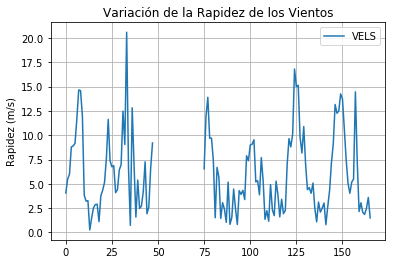

In [12]:
# Gráfica de la rapidez de los vientos (m/s) 
plt.figure(); df.VELS.plot(); plt.legend(loc='best')
plt.title("Variación de la Rapidez de los Vientos")
plt.ylabel("Rapidez (m/s)")
plt.grid(True)
plt.show()

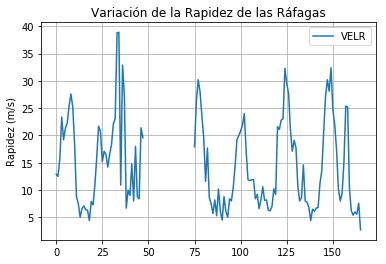

In [13]:
# Gráfica de la rapidez de las ráfagas (m/s) 
plt.figure(); df.VELR.plot(); plt.legend(loc='best')
plt.title("Variación de la Rapidez de las Ráfagas")
plt.ylabel("Rapidez (m/s)")
plt.grid(True)
plt.show()

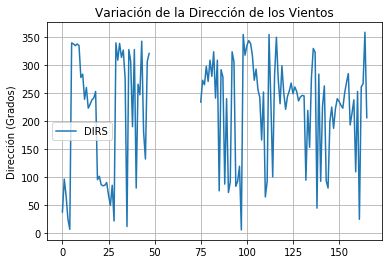

In [14]:
# Gráfica de la dirección de los vientos (Grados)
plt.figure(); df.DIRS.plot(); plt.legend(loc='best')
plt.title("Variación de la Dirección de los Vientos")
plt.ylabel("Dirección (Grados)")
plt.grid(True)
plt.show()

<Figure size 432x288 with 0 Axes>

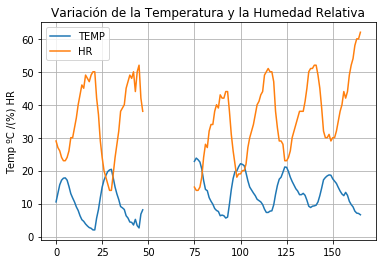

In [15]:
# Gráfica de Temperatura y Humedad Relativa
df1 = df[['TEMP','HR']]
plt.figure(); df1.plot(); plt.legend(loc='best')
plt.title("Variación de la Temperatura y la Humedad Relativa")
plt.ylabel("Temp ºC /(%) HR")
plt.grid(True)
plt.show()

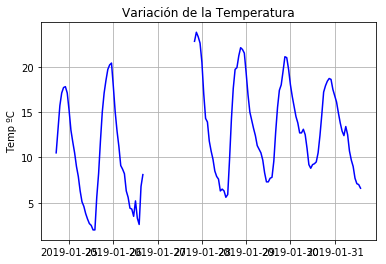

In [16]:
# Gráfica de la variación de la temperatura como función del tiempo
plt.plot_date(x=df.FECHA, y=df.TEMP, fmt="b-")
plt.title("Variación de la Temperatura")
plt.ylabel("Temp ºC")
plt.grid(True)
plt.show()

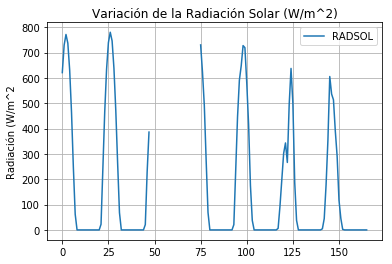

In [17]:
# Gráfica de la radiación solar como función del tiempo 
plt.figure(); df.RADSOL.plot(); plt.legend(loc='best')
plt.title("Variación de la Radiación Solar (W/m^2)")
plt.ylabel("Radiación (W/m^2")
plt.grid(True)
plt.show()

In [22]:
# Con los datos que nos arrojó al realizar el análisis exploratorio de datos,
# podemos observar las temperaturas máxima y mínima:

Tmax = df.TEMP.max()
Tmin = df.TEMP.min()
print('La diferencia entre la temperatura máxima y mínima es', Tmax - Tmin, '°C')

La diferencia entre la temperatura máxima y mínima es 21.8 °C
